## Chapter 15 Metrics and Regression Evaluation

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn import (
    model_selection,
    preprocessing,
)
import warnings
warnings.filterwarnings('ignore')

In [8]:
b = load_boston()
bos_X = pd.DataFrame(
    b.data, columns=b.feature_names
)
bos_y = b.target

In [9]:
bos_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
bos_X_train, bos_X_test, bos_y_train, bos_y_test = model_selection.train_test_split(
    bos_X,
    bos_y,
    test_size=0.3,
    random_state=42,
)

In [12]:
bos_sX = preprocessing.StandardScaler().fit_transform(bos_X)
bos_sX_train, bos_sX_test, bos_sy_train, bos_sy_test = model_selection.train_test_split(
    bos_sX,
    bos_y,
    test_size=0.3,
    random_state=42,
)

In [13]:
rfr = RandomForestRegressor(
    random_state=42, n_estimators=100
)
rfr.fit(bos_X_train, bos_y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

## Metrics

In [14]:
from sklearn import metrics
rfr.score(bos_X_test, bos_y_test)
bos_y_test_pred = rfr.predict(bos_X_test)
metrics.r2_score(bos_y_test, bos_y_test_pred)

0.8721182042634867

In [15]:
metrics.explained_variance_score(
    bos_y_test, bos_y_test_pred
)

0.8724890451227875

In [16]:
metrics.mean_absolute_error(
    bos_y_test, bos_y_test_pred
)

2.0839802631578945

In [17]:
metrics.mean_squared_error(
    bos_y_test, bos_y_test_pred
)

9.52886846710526

In [18]:
metrics.mean_squared_log_error(
    bos_y_test, bos_y_test_pred
)

0.021282630617764326

## Residuals plot

In [20]:
import statsmodels.stats.api as sms
resids = bos_y_test - rfr.predict(bos_X_test)
hb = sms.het_breuschpagan(resids, bos_X_test)
labels = [
    "Lagrange multiplier statistic",
    "p-value",
    "f-value",
    "f p-value",
]
for name, num in zip(labels, hb):
    print(name, ' ', num)

Lagrange multiplier statistic   35.74638129637462
p-value   0.00035583927923274597
f-value   3.287736863329752
f p-value   0.00022357175512297795


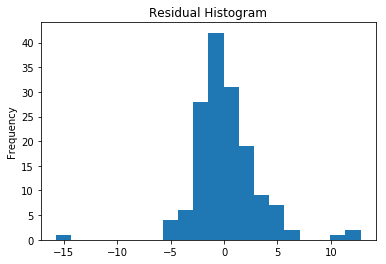

In [21]:
fig, ax = plt.subplots(figsize=(6, 4))
resids = bos_y_test - rfr.predict(bos_X_test)
pd.Series(resids, name="residuals").plot.hist(
    bins=20, ax=ax, title="Residual Histogram"
)

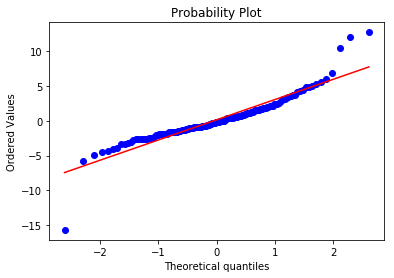

In [22]:
from scipy import stats
fig, ax = plt.subplots(figsize=(6, 4))
_ = stats.probplot(resids, plot=ax)
#fig.savefig("images/mlpr_1503.png", dpi=300)

In [23]:
stats.kstest(resids, cdf="norm")

KstestResult(statistic=0.1962230021010155, pvalue=1.3283596864921421e-05)